# Skip to the section labeled "Start Here"

To reduce excessive API pulls, pull data from CSV

In [62]:
# Dependencies
import requests
import json
import numpy as np
import pandas as pd
import matplotlib as plt

# Import the API key
target_airport = "SFO"
date_from = "2023-09-04"
date_to = "2023-09-10"
target_url = f"https://aviation-edge.com/v2/public/flightsHistory?key=1ca3db-1f82e0&code={target_airport}&type=departure&date_from={date_from}&date_to={date_to}"

In [63]:
airport_data = requests.get(target_url).json()


In [64]:
print(json.dumps(airport_data, indent=4, sort_keys=True))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [65]:
len(airport_data)
airport_data[0]
airport = json.dumps(airport_data, indent=4, sort_keys=True)
print(airport)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [66]:
df = pd.read_json(airport)
airline = pd.json_normalize(df['airline'])
airline = airline.drop(["iataCode","icaoCode"], axis=1 )
airline

,name
0,air france
1,aeromexico
2,delta air lines
3,klm
4,air new zealand
...,...
12564,flexjet
12565,netjets aviation
12566,air canada
12567,united airlines


In [67]:
arrival = pd.json_normalize(df['arrival'])
arrival = arrival['iataCode']
arrival

0        lhr
1        lhr
2        lhr
3        lhr
4        lhr
        ... 
12564    bzn
12565    teb
12566    yeg
12567    ewr
12568    sjc
Name: iataCode, Length: 12569, dtype: object

In [68]:
codeshared = pd.json_normalize(df['codeshared'])
codeshared = codeshared["airline.iataCode"]
codeshared

0         vs
1         vs
2         vs
3         vs
4         vs
        ... 
12564    NaN
12565    NaN
12566    NaN
12567    NaN
12568    NaN
Name: airline.iataCode, Length: 12569, dtype: object

In [69]:
depart = pd.json_normalize(df['departure'])
departure = depart['scheduledTime']
delay = depart['delay']
delay

0         9.0
1         9.0
2         9.0
3         9.0
4         9.0
         ... 
12564    34.0
12565    27.0
12566    15.0
12567    57.0
12568    55.0
Name: delay, Length: 12569, dtype: float64

In [70]:
flight = pd.json_normalize(df['flight'])
flight = flight["iataNumber"]
flight

0        af9650
1        am7673
2        dl5964
3        kl4838
4        nz4162
          ...  
12564    lxj598
12565     1i923
12566     ac558
12567    ua8196
12568          
Name: iataNumber, Length: 12569, dtype: object

In [71]:
df = pd.read_json(airport)
#status = pd.json_normalize(df['status'])
status = df.loc[:, 'status']

In [72]:
code = []
for x in codeshared:
    if str(type(x)) =="<class 'float'>":
        code.append("True")
    else :
        code.append("False")
code = pd.Series(code, name='Codesharing')
df_dataset = pd.concat([airline, arrival, code, departure, delay, flight, status], axis=1)
df_dataset = df_dataset.rename(columns={"name": "Airline","iataCode": "Arrival airport", "scheduledTime": "Scheduled departure"})

In [73]:
df_dataset

,Airline,Arrival airport,Codesharing,Scheduled departure,delay,iataNumber,status
0,air france,lhr,False,2023-09-03t17:01:00.000,9.0,af9650,active
1,aeromexico,lhr,False,2023-09-03t17:01:00.000,9.0,am7673,active
2,delta air lines,lhr,False,2023-09-03t17:01:00.000,9.0,dl5964,active
3,klm,lhr,False,2023-09-03t17:01:00.000,9.0,kl4838,active
4,air new zealand,lhr,False,2023-09-03t17:01:00.000,9.0,nz4162,active
...,...,...,...,...,...,...,...
12564,flexjet,bzn,True,2023-09-10t16:00:00.000,34.0,lxj598,active
12565,netjets aviation,teb,True,2023-09-10t16:00:00.000,27.0,1i923,active
12566,air canada,yeg,True,2023-09-10t15:05:00.000,15.0,ac558,active
12567,united airlines,ewr,True,2023-09-10t16:30:00.000,57.0,ua8196,active


In [74]:
df_data = df_dataset.loc[df_dataset["Codesharing"] == "True"]
df_data = df_data.loc[df_dataset["status"] == "active"]
df_data["delay"] = df_data["delay"].fillna(0)
df_data

,Airline,Arrival airport,Codesharing,Scheduled departure,delay,iataNumber,status
6,virgin atlantic,lhr,True,2023-09-03t17:01:00.000,9.0,vs20,active
12,air canada,yvr,True,2023-09-03t17:05:00.000,20.0,ac569,active
13,emirates,dxb,True,2023-09-03t17:05:00.000,33.0,ek226,active
17,delta air lines,slc,True,2023-09-03t17:18:00.000,29.0,dl2443,active
21,alaska airlines,sea,True,2023-09-03t17:20:00.000,12.0,as1099,active
...,...,...,...,...,...,...,...
12564,flexjet,bzn,True,2023-09-10t16:00:00.000,34.0,lxj598,active
12565,netjets aviation,teb,True,2023-09-10t16:00:00.000,27.0,1i923,active
12566,air canada,yeg,True,2023-09-10t15:05:00.000,15.0,ac558,active
12567,united airlines,ewr,True,2023-09-10t16:30:00.000,57.0,ua8196,active


In [75]:
airlines_sort = df_data.groupby(by=["Airline"]).count()
airlines_sort = airlines_sort.sort_values(by=['Arrival airport'], ascending=False)
airlines_sort

,Arrival airport,Codesharing,Scheduled departure,delay,iataNumber,status
Airline,,,,,,
united airlines,1624,1624,1624,1624,1624,1624
alaska airlines,519,519,519,519,519,519
delta air lines,259,259,259,259,259,259
american airlines,223,223,223,223,223,223
southwest airlines,176,176,176,176,176,176
...,...,...,...,...,...,...
cb skyshare,1,1,1,1,1,1
private jets,1,1,1,1,1,1
hop-a-jet,1,1,1,1,1,1


In [76]:
airlines_sort.iloc[0:10,:].index

Index(['united airlines', 'alaska airlines', 'delta air lines',
       'american airlines', 'southwest airlines', 'netjets aviation',
       'jetblue airways', 'air canada', 'frontier airlines', 'flexjet'],
      dtype='object', name='Airline')

In [77]:
# make a loop for each airline here
airlines_list = df_data['Arrival airport'].unique()

test = df_data.groupby(['Airline'])['delay'].mean(numeric_only=True)



In [78]:
test = df_data[df_data['Airline'] == 'united airlines']
test

,Airline,Arrival airport,Codesharing,Scheduled departure,delay,iataNumber,status
44,united airlines,ord,True,2023-09-03t17:47:00.000,13.0,ua1114,active
61,united airlines,anc,True,2023-09-03t18:25:00.000,11.0,ua2481,active
67,united airlines,sat,True,2023-09-03t18:25:00.000,13.0,ua2611,active
68,united airlines,psc,True,2023-09-03t18:25:00.000,6.0,ua5617,active
80,united airlines,mci,True,2023-09-03t18:28:00.000,12.0,ua2061,active
...,...,...,...,...,...,...,...
12536,united airlines,iah,True,2023-09-10t10:15:00.000,41.0,ua3920,active
12556,united airlines,slc,True,2023-09-10t09:30:00.000,36.0,ua2932,active
12557,united airlines,slc,True,2023-09-10t11:45:00.000,54.0,ua2931,active
12560,united airlines,bos,True,2023-09-10t12:55:00.000,216.0,ua8152,active


In [79]:
df_data.groupby(['Airline']).count()

,Arrival airport,Codesharing,Scheduled departure,delay,iataNumber,status
Airline,,,,,,
abx air,2,2,2,2,2,2
aer lingus,14,14,14,14,14,14
aeromexico,14,14,14,14,14,14
air canada,96,96,96,96,96,96
air caraibes,3,3,3,3,3,3
...,...,...,...,...,...,...
vietnam airlines,4,4,4,4,4,4
virgin atlantic,14,14,14,14,14,14
westjet,25,25,25,25,25,25


In [80]:
df_data.to_csv('df_data.csv')

# *Start Here*

Pull data from CSV to create dataframe

In [2]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib as plt


df_data = pd.read_csv('df_data.csv')

# Flight Delay Ratios by Airline

- Table shows the ratios of delayed flights. Also includes average delay by airline.

In [4]:
# Find delay ratio by airline

# Find total number of flights per airline

flight_count = df_data.groupby(['Airline'])['status'].count()
flight_count

# Find total number of delayed flights (>30min)

delay_count = df_data[df_data['delay'] > 30]['Airline'].value_counts()


summary_delays = pd.DataFrame()

summary_delays = summary_delays.append([delay_count, flight_count]).transpose()

summary_delays.columns.values[0] = 'Total Delayed Flights'
summary_delays.columns.values[1] = 'Total Flights'

summary_delays = summary_delays.fillna(0)
# Determine delay ratio

summary_delays['Delay Ratio (%)'] = (summary_delays['Total Delayed Flights']/summary_delays['Total Flights'])*100

# Determine average delay time
delay_trimmed = df_data[df_data['delay'] > 30]
summary_delays["Average Delay (min)"] = delay_trimmed.groupby(['Airline'])['delay'].mean()
summary_delays = summary_delays.fillna(0)
summary_delays


/var/folders/78/238gl0sx3sv0k3ys61_lz22w0000gn/T/ipykernel_70716/3564960806.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_delays = summary_delays.append([delay_count, flight_count]).transpose()


,Total Delayed Flights,Total Flights,Delay Ratio (%),Average Delay (min)
united airlines,459.0,1624.0,28.263547,61.363834
alaska airlines,84.0,519.0,16.184971,69.059524
delta air lines,43.0,259.0,16.602317,94.255814
jetblue airways,41.0,102.0,40.196078,109.560976
american airlines,38.0,223.0,17.040359,121.000000
...,...,...,...,...
trident aircraft,0.0,1.0,0.000000,0.000000
verijet,0.0,1.0,0.000000,0.000000
vietnam airlines,0.0,4.0,0.000000,0.000000
worldwide jet charter,0.0,2.0,0.000000,0.000000


# Flight Delay Bar Chart

In [5]:
import matplotlib.pyplot as plt

In [6]:
summary_delays.reset_index(drop=False, inplace=True)
summary_delays.columns.values[0] = 'Airline'
summary_delays

,Airline,Total Delayed Flights,Total Flights,Delay Ratio (%),Average Delay (min)
0,united airlines,459.0,1624.0,28.263547,61.363834
1,alaska airlines,84.0,519.0,16.184971,69.059524
2,delta air lines,43.0,259.0,16.602317,94.255814
3,jetblue airways,41.0,102.0,40.196078,109.560976
4,american airlines,38.0,223.0,17.040359,121.000000
...,...,...,...,...,...
79,trident aircraft,0.0,1.0,0.000000,0.000000
80,verijet,0.0,1.0,0.000000,0.000000
81,vietnam airlines,0.0,4.0,0.000000,0.000000
82,worldwide jet charter,0.0,2.0,0.000000,0.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

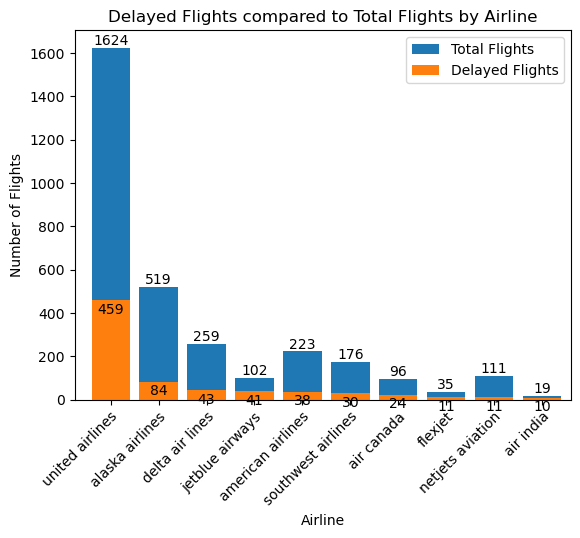

In [7]:
# Creat bar graph containers for total flights and total delayed flights.
graph_total = plt.bar(summary_delays['Airline'], summary_delays['Total Flights'])
graph_delay = plt.bar(summary_delays['Airline'], summary_delays['Total Delayed Flights'])

# Set up labeling
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlim([-.75, 9.6])
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.title("Delayed Flights compared to Total Flights by Airline")
plt.legend(['Total Flights', 'Delayed Flights'])

# Add counts to each bar graph for better readability
plt.bar_label(container=graph_delay, padding=-12)
plt.bar_label(container=graph_total, padding=0)
plt.tight_layout

# Statistics Flight Delay (30 min plus)

In [8]:
# Airlines - excluded flights on-time (<30 min)
airlines_30min = df_data[df_data['delay'] > 30]
airlines_sort_30min = airlines_30min.groupby(by=["Airline"]).count()
airlines_sort_30min = airlines_sort_30min.sort_values(by=['Arrival airport'], ascending=False)

#loop for each airline 
airlines_list = airlines_sort_30min.iloc[0:10,0].index
delay_list = []
mean_list = []
for x in airlines_list:
    delay_time = airlines_30min.loc[airlines_30min["Airline"] == x, "delay"]
    mean = delay_time.mean()
    mean_list.append(mean)
    delay_list.append(delay_time)
    quartiles = delay_time.quantile([0.25, 0.5, 0.75])
    lowerq = round(quartiles.loc[.25],1)
    upperq = round(quartiles.loc[.75],1)
    iqr = upperq - lowerq
    lower_bound = round(lowerq - (1.5*iqr),1)
    upper_bound = round(upperq + (1.5*iqr),1)
    outliers = delay_time.loc[(delay_time < lower_bound) | (delay_time > upper_bound)]
    outliers = len(outliers)
    print(f"The average delay time for {x} (excluding < 30 min delay) is {round(mean)} min")
    print(f"The outliers are considered above {upper_bound} min for {x}, in total {outliers} outlier(s) ")
    print("-------------")


The average delay time for united airlines (excluding < 30 min delay) is 61 min
The outliers are considered above 111.5 min for united airlines, in total 29 outlier(s) 
-------------
The average delay time for alaska airlines (excluding < 30 min delay) is 69 min
The outliers are considered above 168.8 min for alaska airlines, in total 2 outlier(s) 
-------------
The average delay time for delta air lines (excluding < 30 min delay) is 94 min
The outliers are considered above 300.5 min for delta air lines, in total 2 outlier(s) 
-------------
The average delay time for jetblue airways (excluding < 30 min delay) is 110 min
The outliers are considered above 247.0 min for jetblue airways, in total 3 outlier(s) 
-------------
The average delay time for american airlines (excluding < 30 min delay) is 121 min
The outliers are considered above 252.0 min for american airlines, in total 6 outlier(s) 
-------------
The average delay time for southwest airlines (excluding < 30 min delay) is 43 min


In [9]:
airlines_30min

,Unnamed: 0,Airline,Arrival airport,Codesharing,Scheduled departure,delay,iataNumber,status
2,13,emirates,dxb,True,2023-09-03t17:05:00.000,33.0,ek226,active
22,77,delta air lines,lax,True,2023-09-03t18:28:00.000,231.0,dl2606,active
25,87,turkish airlines,ist,True,2023-09-03t18:30:00.000,35.0,tk80,active
35,124,united airlines,msp,True,2023-09-03t18:44:00.000,62.0,ua1554,active
36,131,united airlines,rno,True,2023-09-03t18:44:00.000,50.0,ua4787,active
...,...,...,...,...,...,...,...,...
3755,12559,netjets aviation,sna,True,2023-09-10t12:54:00.000,34.0,1i783,active
3756,12560,united airlines,bos,True,2023-09-10t12:55:00.000,216.0,ua8152,active
3760,12564,flexjet,bzn,True,2023-09-10t16:00:00.000,34.0,lxj598,active
3763,12567,united airlines,ewr,True,2023-09-10t16:30:00.000,57.0,ua8196,active


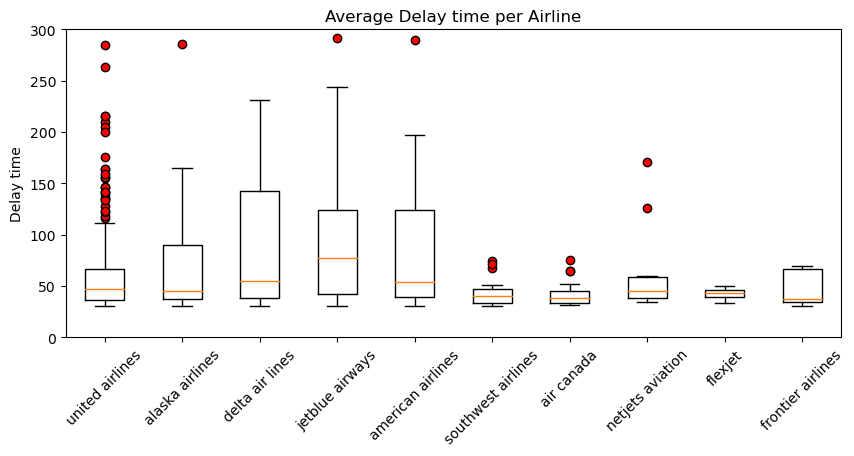

In [10]:
# Plot the stats
orange_out = dict(markerfacecolor = "red")
plt.figure(figsize=(10,4))
plt.boxplot(delay_list, labels = airlines_list, flierprops = orange_out)
plt.xticks(rotation=45, horizontalalignment="center")
plt.ylim(0, 300) 
plt.ylabel("Delay time")
plt.title("Average Delay time per Airline")
plt.show()

# Collect coordinates for each destination airport

In [11]:
from test2 import airlab

airlab_url = 'https://airlabs.co/api/v9/airports?'

# params = {
#     'api_key' : airlab,
#     'iata_code' : airport_code,
# }

In [12]:
airport_list = list(df_data['Arrival airport'].unique())


In [136]:
responses = []

for airport in airport_list:
    params = {
    'api_key' : airlab,
    'iata_code' : airport,
}
    responses.append(requests.get(airlab_url, params=params))

In [137]:
for i, response in enumerate(responses):
    responses[i] = response.json()

In [138]:
name = []
lat = []
long = []

for i in range(len(responses)):
    
    try:
        name.append(responses[i]['response'][0]['name'])
        lat.append(responses[i]['response'][0]['lat'])
        long.append(responses[i]['response'][0]['lng'])
        
    except:
        print(f"No data available: iteration {i}")

No data available: iteration 159


In [139]:
airport_list.pop(159)
airport_df = pd.DataFrame()
airport_df[['Airport', 'Latitude', 'Longitude']] = ''
airport_df['Airport Code'] = airport_list
airport_df.fillna('', inplace=True)

airport_df['Airport'] = name
airport_df['Latitude'] = lat
airport_df['Longitude'] = long
airport_df

,Airport,Latitude,Longitude,Airport Code
0,London Heathrow Airport,51.47115,-0.45649,lhr
1,Vancouver International Airport,49.19489,-123.17923,yvr
2,Dubai International Airport,25.25278,55.36444,dxb
3,Salt Lake City International Airport,40.78688,-111.98203,slc
4,Seattle-Tacoma International Airport,47.44899,-122.30929,sea
...,...,...,...,...
177,Long Beach Airport,33.81752,-118.15229,lgb
178,Flying Cloud Airport,44.82719,-93.45717,fcm
179,Idaho Falls Regional Airport,43.51361,-112.07083,ida
180,Auburn-Opelika Robert G Pitts Airport,32.61541,-85.43606,auo


In [140]:
frequency = df_data['Arrival airport'].value_counts()
frequency = frequency.to_frame()
frequency.reset_index(inplace=True)
frequency.rename(columns={'index':'Airport Code', 'Arrival airport':'Count'}, inplace=True)

frequency

coord_table = pd.merge(airport_df, frequency, on='Airport Code')
coord_table.to_csv('coord_table.csv', encoding=('utf-8'))